In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Reviews.csv',nrows=500)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [19]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [20]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [22]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [23]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x : str(TextBlob(x).correct()))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Text'].head()

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Kalyani\AppData\Local\Temp\ipykernel_18256\3617732521.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['Text'] = df['Text'].str.replace('[^\w\s]','')


0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanuts....
2    connection around centuries. light, pillow cit...
3    looking secret ingredient robitussin believe f...
4    great staff great price. wide assortment mummy...
Name: Text, dtype: object

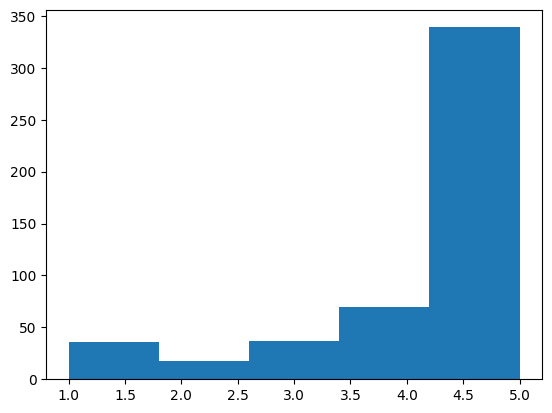

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [24]:
reviews =df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [25]:
score1=reviews[reviews['Score'] == 1].sample(n=18)
score2=reviews[reviews['Score'] == 2].sample(n=18)
score3=reviews[reviews['Score'] == 3].sample(n=18)
score4=reviews[reviews['Score'] == 4].sample(n=18)
score5=reviews[reviews['Score'] == 5].sample(n=18)

In [32]:
reviews.sample = pd.concat([score1, score2, score3, score4, score5], axis=0)
reviews.sample = reviews.sample.reset_index(drop=True)

print(reviews.sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


In [33]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/b9/74/6a15f68f59bc90032bfcf62eca796a5675be95e1aaf84f7861e1bfcfa8e5/wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.2 kB 93.5 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/301.2 kB 130.7 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.2 kB 181.6 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/301.2 kB 227.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 276.8 kB/s eta 0:00:01
   ------------------------- 


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


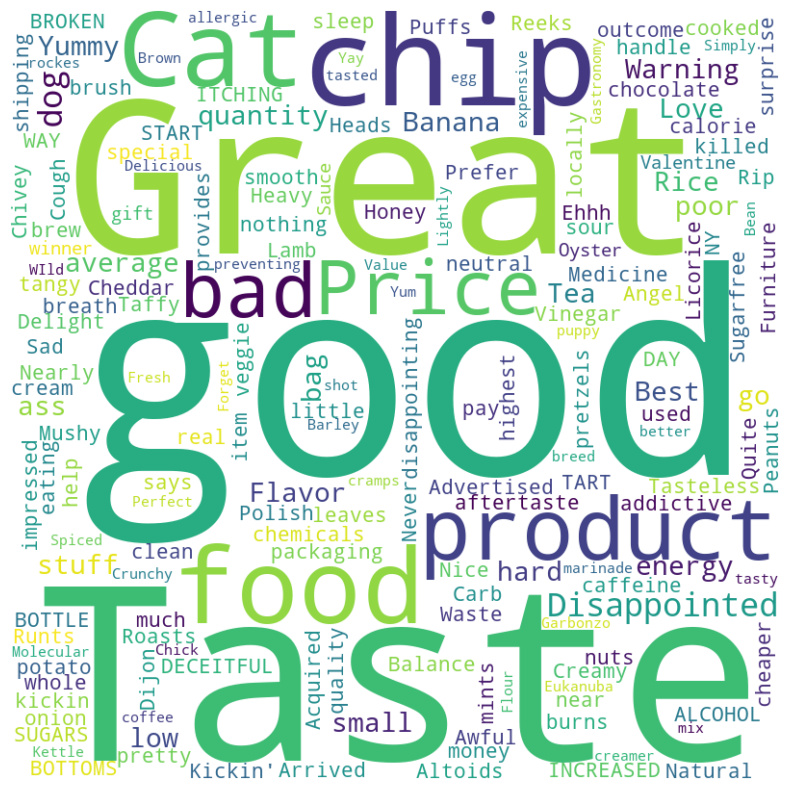

In [36]:
from wordcloud import WordCloud

reviews_str = " ".join(reviews.sample["Summary"].to_numpy())
wordcloud = WordCloud(width = 800, height = 800, background_color ='white').generate(reviews_str)
plt.figure(figsize = (10 ,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
negative_reviews  = reviews.sample[reviews.sample['Score'].isin([1, 2])]
positive_reviews = reviews.sample[reviews.sample['Score'].isin([4, 5])]

negative_reviews_str = negative_reviews["Summary"].str.cat()
positive_reviews_str = positive_reviews["Summary"].str.cat()

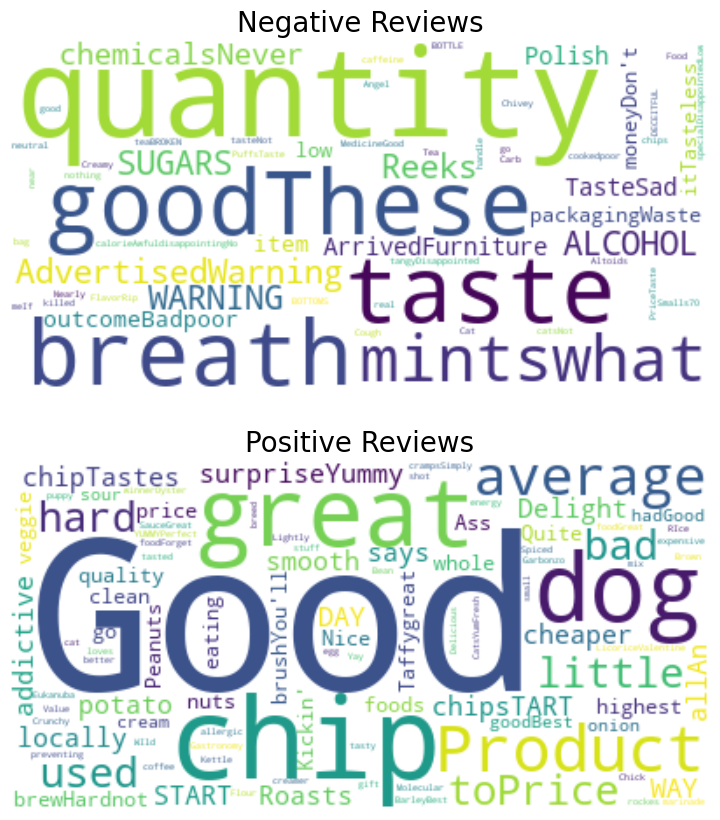

In [41]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative Reviews', fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive Reviews', fontsize=20)
plt.show()

In [ ]:
vader sentiment analysis

In [42]:
pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 220.2 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 219.4 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 252.2 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 252.2 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/126.0 kB 328.2 kB/s eta 0:00:01
   ----------------------


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp=sns.color_palette()
analyzer=SentimentIntensityAnalyzer()
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [46]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.126,0.623,0.250,0.7880
3,0.000,0.868,0.132,0.4404
4,0.000,0.455,0.545,0.9186


In [47]:
df_c=pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880


In [48]:
df_c['Sentiment']=np.where(df_c['compound']>=0, 'Positive', 'Negative')
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880,Positive


Sentiment
Positive    458
Negative     42
Name: count, dtype: int64


<Axes: xlabel='Sentiment'>

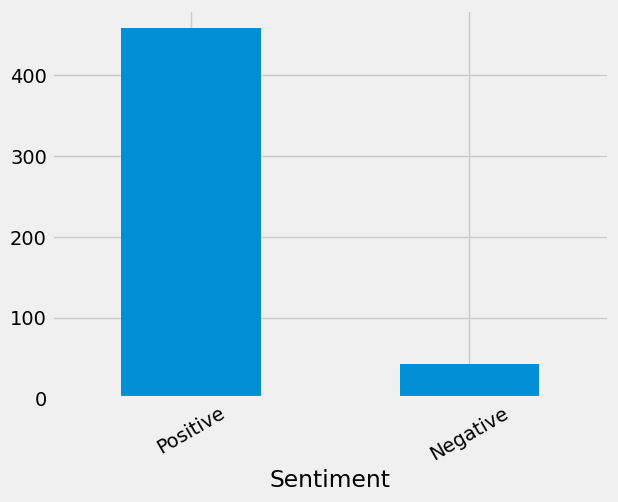

In [49]:
result=df_c['Sentiment'].value_counts()
print(result)
result.plot(kind='bar', rot=30)